In [1]:
# Just like we use gini impurity or entropy to create the root node in decision tree classification, we use mean squared error 
# to create the root node in decision tree regression.

In [2]:
from IPython.display import Image

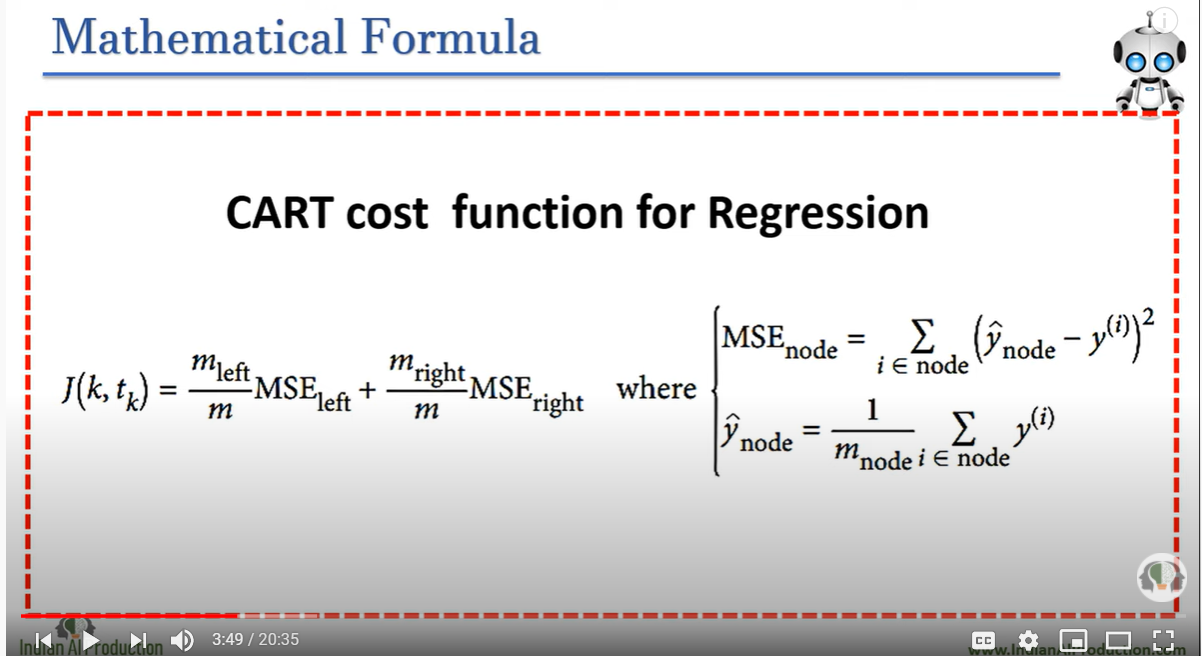

In [3]:
Image(filename="formula.png",width=500)

In [4]:
# In decision tree classification, we try to minimize the impurity whereas in decision tree regression, we try to minimize
# the mean squared error.

In [5]:
################################################################################################################################
# Note: Decision tree regression generally overfits the data. So we use Regularization techniques to make it more generalized. #
################################################################################################################################

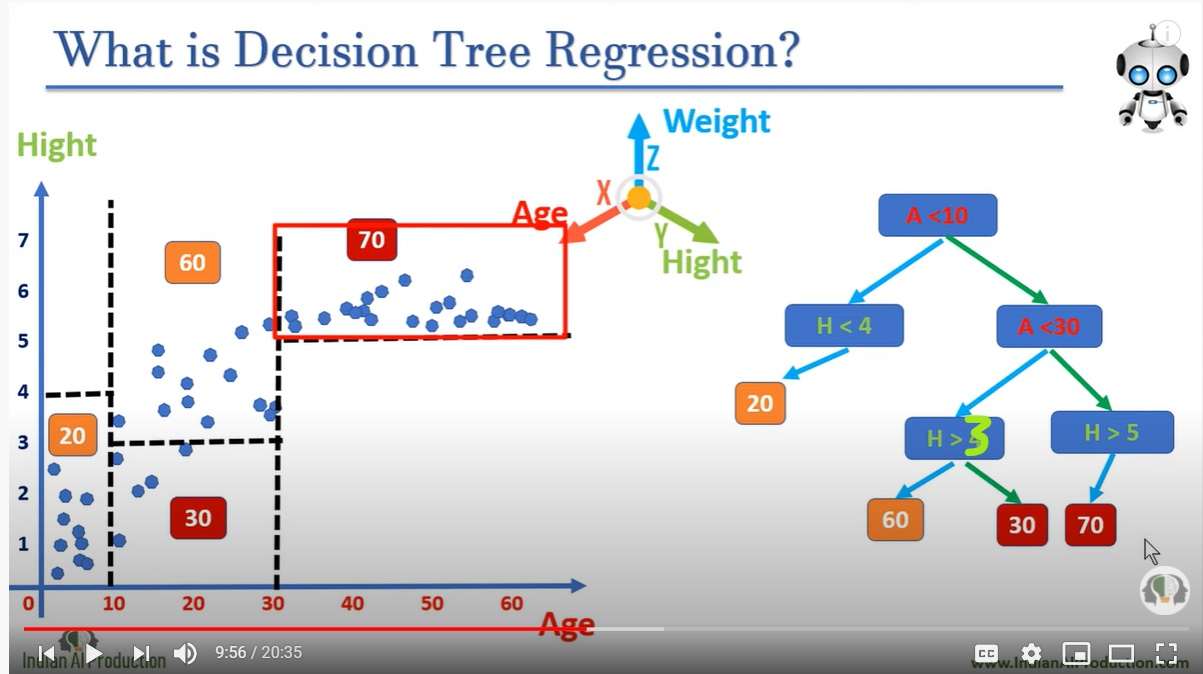

In [10]:
# Process to draw a decision tree regression:
Image(filename="regression1.jpg",width=700)

In [11]:
# Consider our graph to have age on x-axis, height on y-axis and weight as the datapoints.
# First we split the data from the x-axis i.e., whether the age is <10 or >10. The blue lines indicate yes and the green lines
# indicate no. If the age is less than 10, we split the data from the y-axis i.e., whether the height is <4 or >4. If the
# height is less than 4 then we take the average of all the datapoints in that area and that value becomes our leaf node.
# Similarly we check the value for height > 4. Repeat the whole procedure until we cover the area of the entire dataset(graph).

In [13]:
# Hence, if any of our test data lies in a particular area, its value will be the avg. value that we have found earlier.

In [14]:
# Make sure that the decision tree regression overfits itself and hence we must regularize it before deploying.

In [15]:
import pandas as pd

In [20]:
path = r"https://drive.google.com/uc?export=download&id=1xxDtrZKfuWQfl-6KA9XEd_eatitNPnkB" 
df = pd.read_csv(path)
pd.set_option("display.max_columns",None)

In [21]:
df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Haralur Road,location_Hennur Road,location_Bannerghatta Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_7th Phase JP Nagar,location_Yelahanka,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Kasavanhalli,location_Bellandur,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Jakkur,location_Electronics City Phase 1,location_Varthur,location_Chandapura,location_HSR Layout,location_Hennur,location_Ramamurthy Nagar,location_Ramagondanahalli,location_Kaggadasapura,location_Kundalahalli,location_Koramangala,location_Hulimavu,location_Budigere,location_Hoodi,location_Malleshwaram,location_Hegde Nagar,location_8th Phase JP Nagar,location_Gottigere,location_JP Nagar,location_Yeshwanthpur,location_Channasandra,location_Bisuvanahalli,location_Vittasandra,location_Indira Nagar,location_Vijayanagar,location_Kengeri,location_Brookefield,location_Sahakara Nagar,location_Hosa Road,location_Old Airport Road,location_Bommasandra,location_Balagere,location_Green Glen Layout,location_Old Madras Road,location_Rachenahalli,location_Panathur,location_Kudlu Gate,location_Thigalarapalya,location_Ambedkar Nagar,location_Jigani,location_Yelahanka New Town,location_Talaghattapura,location_Mysore Road,location_Kadugodi,location_Frazer Town,location_Dodda Nekkundi,location_Devanahalli,location_Kanakapura,location_Attibele,location_Anekal,location_Lakshminarayana Pura,location_Nagarbhavi,location_Ananth Nagar,location_5th Phase JP Nagar,location_TC Palaya,location_CV Raman Nagar,location_Kengeri Satellite Town,location_Kudlu,location_Jalahalli,location_Subramanyapura,location_Bhoganhalli,location_Doddathoguru,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# We first split our data into independent and target variables

In [23]:
X=df.drop(columns="price")

In [24]:
y=df["price"]

In [25]:
from sklearn.model_selection import train_test_split

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
regressor=DecisionTreeRegressor(criterion="mse")
regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)

0.8851966158819333

In [34]:
# Now we predict the prices:
house_last=X_test.iloc[-1,:]
regressor.predict([house_last])[0]

171.0

In [37]:
# You can see that the price of the house is 171 lakhs
print(f"The price of the house is: {int(regressor.predict([house_last])[0])} lakh rs")

The price of the house is: 171 lakh rs


In [38]:
y_test.iloc[-1]

180.0

In [ ]:
# You can see that the original price of the house was 180 lakh rs.

In [39]:
# We do not feature scale data while using Decision tree algorithm because decision tree algorithm works better with original
# data.